In [1]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
import mplstereonet
import numpy as np
import matplotlib.projections as prjc
import seaborn as sns
import os

The measured data is stored in an excel file with three sheets:
1. Our data, containing faults, fractures and layer.
2. The data from another group.
3. A combined sheet for the faults.

The excel file is loaded into Pandas as two dataframes: 'df' (1 from above) from the worksheet "fm_ours" and 'df_combine' (3 from above) from the worksheet "combined_faults". Each dataframe will be devided into its groups: faults, fractures and layers.

In [6]:
# read the field measurments excel as pandas dataframe
xls_dir = r'E:\Users\Shahar\Documents\OneDrive\Shahar Grad School\Courses\70302 - Structural Geology\Field_Workshop'
xls_file_name = 'field_measurements.xlsx'
xls_file = os.path.join(xls_dir, xls_file_name)
df = pd.read_excel(xls_file, "fm_ours")
df_combine = pd.read_excel(xls_file,"combined_faults")

# split dataframe into faults, fractures and layers
df_faults = df[df['type'] == 'fault']
df_fractures = df[df['type'] == 'fracture']
df_layer = df[df['type'] == 'layer']

In [74]:
print(df_fault)

    msr_num   type  number     name  strike   dip   rake     N_coord  \
0         2  fault       1   fault1     295  75.0   18.0  31° 45.233   
1        37  fault      10  fault10     202  50.0    NaN  31° 45.218   
2        42  fault      11  fault11     300  83.0   30.0  31° 45.238   
3        43  fault      12  fault12     305  50.0   15.0  31° 45.239   
4         3  fault       2   fault2     205  80.0   26.0  31° 45.235   
5         4  fault       3   fault3      90  80.0  150.0  31° 45.235   
6         5  fault       4   fault4     310  83.0   20.0  31° 45.233   
7         6  fault       5   fault5      80  82.0  145.0  31° 45.233   
8         7  fault       6   fault6      85  70.0  150.0  31° 45.236   
9        10  fault       7   fault7     238  60.0   25.0  31° 45.398   
10       35  fault       8   fault8     305  80.0   20.0  31° 45.222   
11       36  fault       9   fault9     190  50.0  110.0  31° 45.218   

       E_coord  Decimal_N  Decimal_E  
0   35° 01.270  31.75388

We'll begin with the faults:
The different faults will be devided into several groups (bins). The binning process is done automatically with the 'auto' keyword for Numpy's histogram.
We'll repeat everything twice: once for our measurments and once for the combined data.

In [165]:
# bin faults with the histograms
#

# automated binned histogram
hist_auto, bins_auto = np.histogram(df_faults.strike, bins='auto') # our measurments, binned
hist_auto_cmbn, bins_auto_cmbn = np.histogram(df_combine.strike, bins='auto') # combined measurments, binned

# full binned histogram
hist_full, bins_full = np.histogram(df_faults.strike, bins=50) # our measurments, unbinned
hist_full_cmbn, bins_full_cmbn = np.histogram(df_combine.strike, bins=50) # combined measurments, unbinned

# add the bins to the dataframe and group by it. The labels will be number of bin, counting from 1
bined = pd.cut(df_fault.strike, bins_auto, labels = [i+1 for i in range(len(bins_auto)-1)])
df_fault = df_fault.assign(bined = pd.cut(df_fault.strike, bins_auto, include_lowest=True)) # add bin range column
df_fault = df_fault.assign(group_num=pd.cut(df_fault.strike, 
                                            bins_auto, include_lowest=True, 
                                            labels = [i+1 for i in range(len(bins_auto)-1)])) # add group name column
groups_bins = df_fault.groupby('group_num')
# repeat for the combined data
bined_cmbn = pd.cut(df_combine.strike, bins_auto_cmbn, labels = [i+1 for i in range(len(bins_auto_cmbn)-1)])
df_combine = df_combine.assign(bined = pd.cut(df_combine.strike, bins_auto_cmbn, include_lowest=True)) # add bin range column
df_combine = df_combine.assign(group_num=pd.cut(df_combine.strike, 
                                            bins_auto_cmbn, include_lowest=True, 
                                            labels = [i+1 for i in range(len(bins_auto_cmbn)-1)])) # add group name column
groups_bins_cmbn = df_combine.groupby('group_num')

Draw the regular histogram. There will be four figures:
1. Histogram of our measurments, ungrouped (showing all the data).
2. Histogram of our measurments, grouped by bins.
3. Histogram of the combined measurments, ungrouped (showing all the data).
4. Histogram of the combined measurments, grouped by bins.

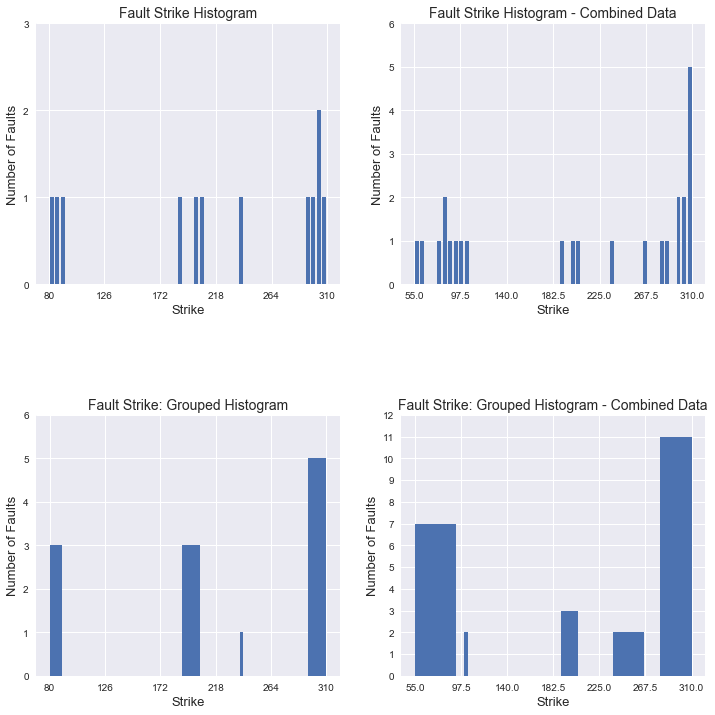

In [8]:
# Draw 4 different histograms
#

# get width and start position for grouped bar
width_grouped = [grp.strike.max()-grp.strike.min() for key, grp in groups_bins]
for ix, itm in enumerate (width_grouped):
    if width_grouped[ix] == 0:
        width_grouped[ix] = 3
start_pos = [grp.strike.min() for key, grp in groups_bins] # make sure the bar starts at tge first value 
# repeat for combined data
width_grouped_cmbn = [grp.strike.max()-grp.strike.min() for key, grp in groups_bins_cmbn]
for ix, itm in enumerate (width_grouped_cmbn):
    if width_grouped_cmbn[ix] == 0:
        width_grouped_cmbn[ix] = 3
start_pos_cmbn = [grp.strike.min() for key, grp in groups_bins_cmbn] # make sure the bar starts at tge first value 

# plot figure
fig = plt.figure(1)
fig.set_size_inches(12, 12)

# Draw
#
# full histogram
width = 0.7 * (bins_full[1] - bins_full[0])
center = (bins_full[:-1] + bins_full[1:]) / 2
plt.subplot(221)  # subplot(rows, columns, crnt_fig)
plt.bar(center, hist_full, width=width)
plt.xticks(bins_auto)
plt.yticks(range(0, max(hist_full)+2, 1))
plt.title("Fault Strike Histogram", fontsize=14)
plt.xlabel("Strike", fontsize=13)
plt.ylabel("Number of Faults", fontsize=13)

# automated grouped histogram
plt.subplot(223)
plt.bar(start_pos, hist_auto, width=width_grouped, align = 'edge')
plt.xticks(bins_auto)
plt.yticks(range(0, max(hist_auto)+2, 1))
plt.title("Fault Strike: Grouped Histogram", fontsize=14)
plt.xlabel("Strike", fontsize=13)
plt.ylabel("Number of Faults", fontsize=13)

# full histogram - combined data
width = 0.7 * (bins_full_cmbn[1] - bins_full_cmbn[0])
center = (bins_full_cmbn[:-1] + bins_full_cmbn[1:]) / 2
plt.subplot(222)
plt.bar(center, hist_full_cmbn, width=width)
plt.xticks(bins_auto_cmbn)
plt.yticks(range(0, max(hist_full_cmbn)+2, 1))
plt.title("Fault Strike Histogram - Combined Data", fontsize=14)
plt.xlabel("Strike", fontsize=13)
plt.ylabel("Number of Faults", fontsize=13)

# automated grouped histogram - combined data
plt.subplot(224)
plt.bar(start_pos_cmbn, hist_auto_cmbn, width=width_grouped_cmbn, align = 'edge')
plt.xticks(bins_auto_cmbn)
plt.yticks(range(0, max(hist_auto_cmbn)+2, 1))
plt.title("Fault Strike: Grouped Histogram - Combined Data", fontsize=14)
plt.xlabel("Strike", fontsize=13)
plt.ylabel("Number of Faults", fontsize=13)

# show plot
plt.subplots_adjust(hspace=0.5)
plt.show()

[ 0.25        0.          0.25        0.08333333  0.41666667] [  80.  126.  172.  218.  264.  310.]


C:\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


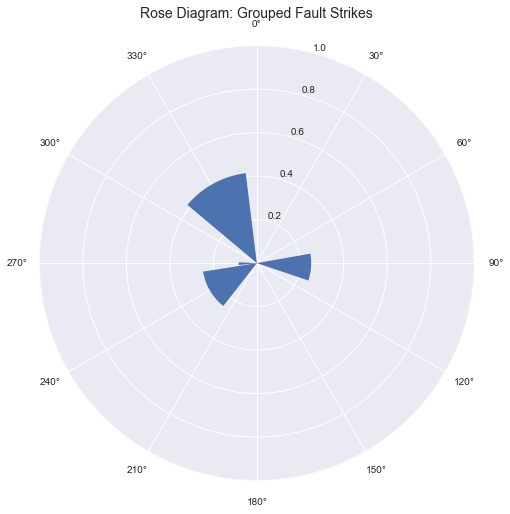

In [9]:
# Rose diagram
# set figure
fig = plt.figure()
fig.set_size_inches(8, 8)

ax = fig.add_subplot(111, projection='polar')
plt.xticks(np.radians(range(0, 360, 30)))
ax.set_theta_direction(-1) # increase clockwise
ax.set_theta_offset(np.pi/2) # offsets the zero point

# get data to histogram
hist_rose = hist_auto
bins_rose = bins_auto
# normalize hist
hist_rose = hist_rose/sum(hist_rose)
#bins_rose = bins_rose - 20
print(hist_rose, bins_rose)
bins_rose = np.radians(bins_rose)
new_bins = np.delete(bins_rose,1)
bars = ax.bar(new_bins, hist_rose, width=[x*0.05 if x>0 else x for x in width_grouped], align='edge')
plt.title("Rose Diagram: Grouped Fault Strikes", fontsize=14)
plt.rgrids([0.2,0.4,0.6,0.8,1.0], angle=15)
plt.show()

The stereonts will be for our measurments and for the combined measurments

C:\Anaconda3\lib\site-packages\mplstereonet\stereonet_math.py:223: RuntimeWarning: invalid value encountered in less
  rake_angle[rake_angle < 0] += 180


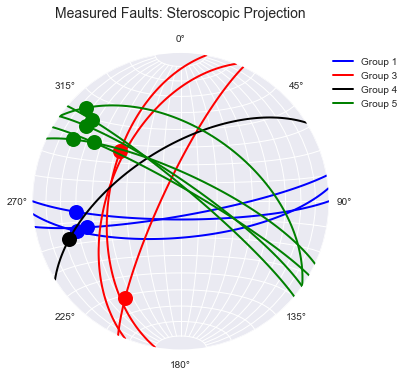

In [231]:
# set figure
fig = plt.figure(1)
fig.set_size_inches(12, 12)

# set colors list
colors = ['blue','yellow','red','black', 'green', 'orange']
legend_labels_groups = ["Group " + str(i+1) for i in range(4)]

# our measurments
ax = fig.add_subplot(211, projection='stereonet')   # subplot(rows, columns, crnt_fig)
i=0
for key, group in groups_bins:    
    ax.plane(group.strike, group.dip, '-', color=colors[i], linewidth=2 ,label="Group " + str(key))
#    ax.pole(group.strike, group.dip, '^',color=colors[i], markersize=10)
    if group.rake.any():
        ax.rake(group.strike, group.dip, group.rake, color=colors[i], markersize=15)
    i=i+1
plt.title("Measured Faults: Steroscopic Projection", fontsize=14, y=1.1)

# show plots
plt.subplots_adjust(hspace=0.2)
lines, labels = ax.get_legend_handles_labels()
legend_handles = [lines[0], lines[3], lines[6], lines[7]]
ax.legend(handles = legend_handles, loc=(1,0.8))
plt.show()

C:\Anaconda3\lib\site-packages\mplstereonet\stereonet_math.py:223: RuntimeWarning: invalid value encountered in less
  rake_angle[rake_angle < 0] += 180


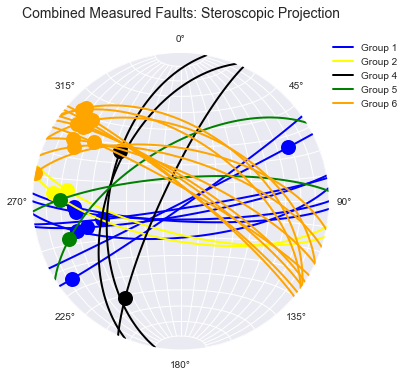

In [245]:
# set figure
fig = plt.figure(1)
fig.set_size_inches(12, 12)

# Combined Measurments
ax = fig.add_subplot(212, projection='stereonet')
i=0
for key, group in groups_bins_cmbn:    
    ax.plane(group.strike, group.dip, '-', color=colors[i], linewidth=2 ,label="Group " + str(key))
  #  ax.pole(group.strike, group.dip, '^',color='blue', markersize=10)
    if group.rake.any():
        ax.rake(group.strike, group.dip, group.rake, color=colors[i], markersize=15)
    i=i+1
plt.title("Combined Measured Faults: Steroscopic Projection", fontsize=14, y=1.1)

# show plots
plt.subplots_adjust(hspace=0.2)
lines, labels = ax.get_legend_handles_labels()
legend_handles = [lines[0], lines[7], lines[9], lines[12], lines[-1]]
ax.legend(handles = legend_handles, loc=(1,0.8))
#ax.legend()
plt.show()

Now we'll choose the two best groups - those that have the most faults in them - and we'll draw them and a mean plane/rake.
We will use only the combined fautls data.

In [183]:
# make a new dataframe with only the two selected groups
#
bined_groups_name = [1,6]
df_selected = df_combine.loc[df_combine['group_num'].isin(bined_groups_name)] # only use the faults of selected groups

# add column for droped rows
df_combine = df_combine.assign(droped = False)

    

In [184]:
# set droped to True for specific faults
list_drop_strikes_1 = [55,63]
list_drop_strikes_6 = [281]
mask_1 = (df_combine.group_num == 1) & (df_combine.strike.isin(list_drop_strikes_1))
mask_6 = (df_combine.group_num == 6) & (df_combine.strike.isin(list_drop_strikes_6))
df_combine.loc[mask_1, 'droped'] = True
df_combine.loc[mask_6, 'droped'] = True

Here should be a code for automatically finding the outliers and marking them "True" in the 'droped' column

In [100]:
# will check if the row is an outlier of the column - returns true or 1.0
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 2 * std
    return outliers

In [144]:
# will check if the row is an outlier of the column - returns nan
def replace_nan(group,stds):
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

In [151]:
df_selected.groupby('group_num').agg(['mean','std'])

msr_num            type        number           name      \
                mean        std mean std      mean       std mean std   
group_num                                                               
1          11.000000  10.708252  NaN NaN  6.857143  3.436499  NaN NaN   
2                NaN        NaN  NaN NaN       NaN       NaN  NaN NaN   
3                NaN        NaN  NaN NaN       NaN       NaN  NaN NaN   
4                NaN        NaN  NaN NaN       NaN       NaN  NaN NaN   
5                NaN        NaN  NaN NaN       NaN       NaN  NaN NaN   
6          24.636364  13.025150  NaN NaN  6.181818  4.445631  NaN NaN   

               strike                   dip                  rake             \
                 mean        std       mean       std        mean        std   
group_num                                                                      
1           78.142857  14.052622  81.857143   6.41427  131.428571  50.162593   
2                 NaN        NaN        NaN       NaN         NaN        NaN   
3                 NaN        NaN        NaN       NaN         NaN        NaN   
4                 NaN        NaN        NaN       NaN         NaN        NaN   
5                 NaN        NaN        NaN       NaN         NaN        NaN   
6          299.636364   9.014130  69.818182  13.09823   17.454545   7.312505   

          bined      
           mean std  
group_num            
1           NaN NaN  
2           NaN NaN  
3           NaN NaN  
4           NaN NaN  
5           NaN NaN  
6           NaN NaN

Find mean of the different groups (combined measurments only) and plot on a stereonet.
We'll use only groups 1 & 6 which have 7 & 11 members.

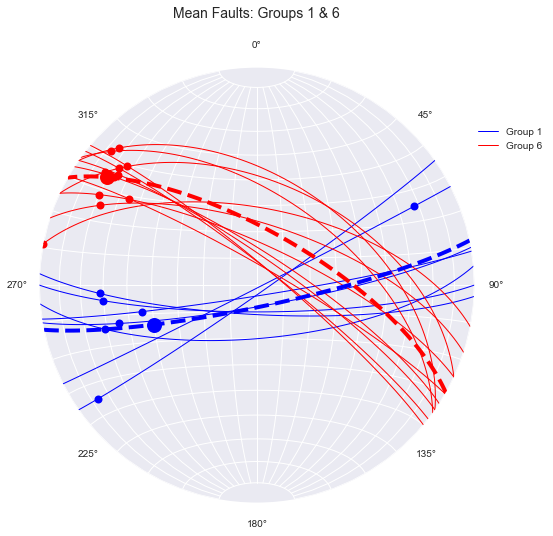

In [247]:
# draw all for the groups

# set figure
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = fig.add_subplot(111, projection='stereonet')   # subplot(rows, columns, crnt_fig)

# set colors list
colors = colors = ['blue','red','yellow', 'black', 'green', 'orange']

# bin groups to use
bined_groups_name = [1,6]
legend_labels = ["Group " + str(i) for i in bined_groups_name]

# all strikes & rakes
i=0
for key, group in groups_bins_cmbn:
    if key in bined_groups_name: # if the group is one of the selected groups
        ax.plane(group.strike, group.dip, '-', color=colors[i], linewidth=1 ,label=key)
        if group.rake.any():
            ax.rake(group.strike, group.dip, group.rake, color=colors[i], markersize=8)
        i=i+1
# mean strike & rake
i=0
for grp in bined_groups_name:
    strike = df_combine[df_combine.group_num == grp].strike.mean()
    dip = df_combine[df_combine.group_num == grp].dip.mean()
    rake = df_combine[df_combine.group_num == grp].rake.mean()
    ax.plane(strike, dip, '--', color=colors[i], linewidth=4 ,label=key)
    ax.rake(strike, dip, rake, color=colors[i], markersize=15)
    i=i+1

    
# set plot    
plt.title("Mean Faults: Groups 1 & 6", fontsize=14, y=1.1)
lines, labels = ax.get_legend_handles_labels()
ax.legend(handles = [lines[0], lines[-3]], labels = legend_labels, loc=(1,0.8))
plt.show()

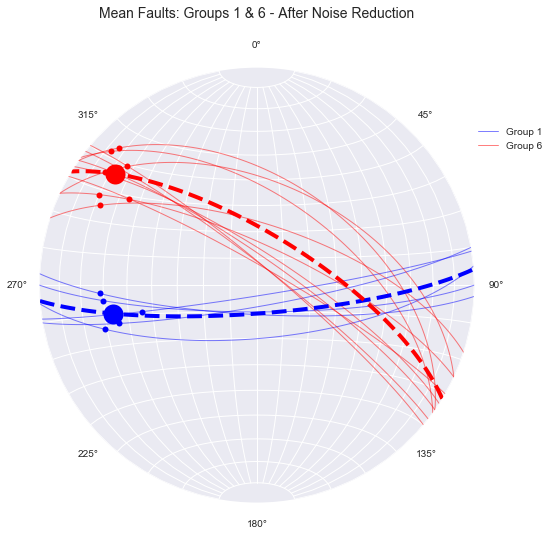

In [250]:
# draw non-droped for the groups

# set figure
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = fig.add_subplot(111, projection='stereonet')   # subplot(rows, columns, crnt_fig)

# set colors list
colors = colors = ['blue','red','yellow', 'black', 'green', 'orange']

# bin groups to use
bined_groups_name = [1,6]
legend_labels = ["Group " + str(i) for i in bined_groups_name]

# all  non-droped strikes & rakes
df_combine_non_drp = df_combine[~df_combine.droped] # ger rows where droped is false
groups_bins_cmbn_non_drp = df_combine_non_drp.groupby('group_num')
i=0
for key, group in groups_bins_cmbn_non_drp:
    if key in bined_groups_name: # if the group is one of the selected groups
        ax.plane(group.strike, group.dip, '-', color=colors[i], linewidth=1 ,label=key, alpha=0.5)
        if group.rake.any():
            ax.rake(group.strike, group.dip, group.rake, color=colors[i], markersize=6)
        i=i+1
# mean strike & rake
i=0
for grp in bined_groups_name:
    strike = df_combine_non_drp[df_combine_non_drp.group_num == grp].strike.mean()
    dip = df_combine_non_drp[df_combine_non_drp.group_num == grp].dip.mean()
    rake = df_combine_non_drp[df_combine_non_drp.group_num == grp].rake.mean()
    ax.plane(strike, dip, '--', color=colors[i], linewidth=4 ,label=key)
    ax.rake(strike, dip, rake, color=colors[i], markersize=20)
    i=i+1

    
# set plot    
plt.title("Mean Faults: Groups 1 & 6 - After Noise Reduction", fontsize=14, y=1.1)
lines, labels = ax.get_legend_handles_labels()
ax.legend(handles = [lines[0], lines[-3]], labels = legend_labels, loc=(1,0.8))
plt.show()

In [252]:
print(df_combine_non_drp[df_combine_non_drp.group_num == 6].strike.mean())
print(df_combine_non_drp[df_combine_non_drp.group_num == 6].dip.mean())
print(df_combine_non_drp[df_combine_non_drp.group_num == 6].rake.mean())

301.5
70.7
19.2


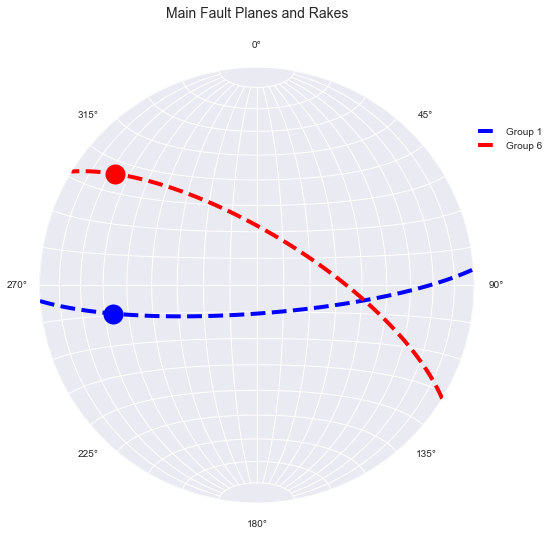

In [256]:
# draw non-droped for the means

# set figure
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = fig.add_subplot(111, projection='stereonet')   # subplot(rows, columns, crnt_fig)

# set colors list
colors = colors = ['blue','red','yellow', 'black', 'green', 'orange']

# bin groups to use
bined_groups_name = [1,6]
legend_labels = ["Group " + str(i) for i in bined_groups_name]

# mean strike & rake
i=0
for grp in bined_groups_name:
    strike = df_combine_non_drp[df_combine_non_drp.group_num == grp].strike.mean()
    dip = df_combine_non_drp[df_combine_non_drp.group_num == grp].dip.mean()
    rake = df_combine_non_drp[df_combine_non_drp.group_num == grp].rake.mean()
    ax.plane(strike, dip, '--', color=colors[i], linewidth=4 ,label=key)
    ax.rake(strike, dip, rake, color=colors[i], markersize=20)
    i=i+1

    
# set plot    
plt.title("Main Fault Planes and Rakes", fontsize=14, y=1.1)
lines, labels = ax.get_legend_handles_labels()
ax.legend(handles = [lines[0], lines[1]], labels = legend_labels, loc=(1,0.8))
plt.show()

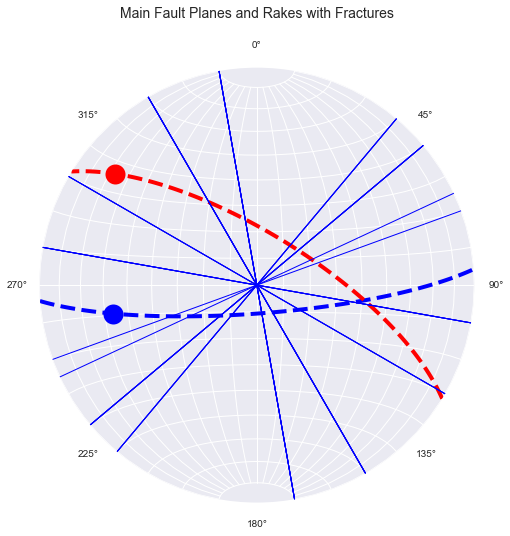

In [269]:
# fractures
# set figure
fig = plt.figure(1)
fig.set_size_inches(8,8)
ax = fig.add_subplot(111, projection='stereonet')   # subplot(rows, columns, crnt_fig)
# set colors list
colors = colors = ['blue','red','yellow', 'black', 'green', 'orange']

# bin groups to use
bined_groups_name = [1,6]
legend_labels = ["Group " + str(i) for i in bined_groups_name]

# mean strike & rake
i=0
for grp in bined_groups_name:
    strike = df_combine_non_drp[df_combine_non_drp.group_num == grp].strike.mean()
    dip = df_combine_non_drp[df_combine_non_drp.group_num == grp].dip.mean()
    rake = df_combine_non_drp[df_combine_non_drp.group_num == grp].rake.mean()
    ax.plane(strike, dip, '--', color=colors[i], linewidth=4 ,label=key)
    ax.rake(strike, dip, rake, color=colors[i], markersize=20)
    i=i+1
# strike only
for strk in df_fractures.strike:
    ax.plane(strk, 90, 'b-', linewidth=1)
    
# set plot    
plt.title("Main Fault Planes and Rakes with Fractures", fontsize=14, y=1.1)
plt.show()

In [264]:
for strk in df_fractures.strike:
    print(strk)

70
100
100
100
100
170
170
170
170
170
170
65
150
150
150
150
150
300
300
300
220
220
220
230
230
230
230


Use combined fault data for analysis

In [35]:
df_combine = pd.read_excel(r'E:\Users\Shahar\Documents\OneDrive\Shahar Grad School\Courses\70302 - Structural Geology\Field_Workshop\field_measurements.xlsx',"combined_faults")
df_combine

,msr_num,type,number,name,strike,dip,rake
0,2,fault,1,fault1,295,75,18.0
1,37,fault,10,fault10,202,50,NaN
2,42,fault,11,fault11,300,83,30.0
3,43,fault,12,fault12,305,50,15.0
4,3,fault,2,fault2,205,80,26.0
5,4,fault,3,fault3,90,80,150.0
6,5,fault,4,fault4,310,83,20.0
7,6,fault,5,fault5,80,82,145.0
8,7,fault,6,fault6,85,70,150.0
9,10,fault,7,fault7,238,60,25.0


[ 0.28  0.08  0.    0.12  0.08  0.44] [  55.    97.5  140.   182.5  225.   267.5  310. ]


C:\Anaconda3\lib\site-packages\matplotlib\projections\polar.py:65: RuntimeWarning: invalid value encountered in less
  mask = r < 0


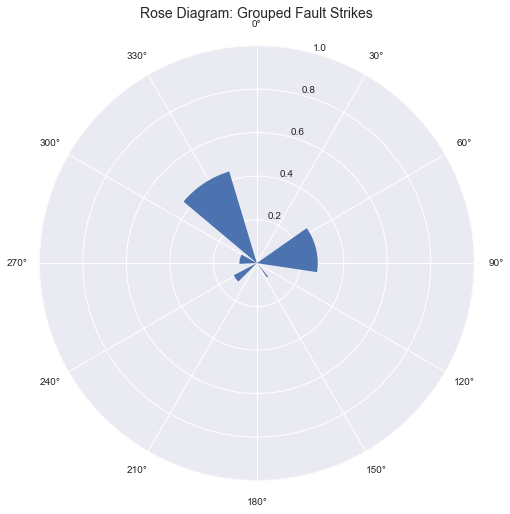

In [41]:
# Rose diagram
# set figure
fig = plt.figure()
fig.set_size_inches(8, 8)

ax = fig.add_subplot(111, projection='polar')
plt.xticks(np.radians(range(0, 360, 30)))
ax.set_theta_direction(-1) # increase clockwise
ax.set_theta_offset(np.pi/2) # offsets the zero point

# get data to histogram
hist_rose = hist_auto
bins_rose = bins_auto
# normalize hist
hist_rose = hist_rose/sum(hist_rose)
#bins_rose = bins_rose - 20
print(hist_rose, bins_rose)
bins_rose = np.radians(bins_rose)
new_bins = np.delete(bins_rose,1)
bars = ax.bar(new_bins, hist_rose, width=[x*0.02 if x>0 else x for x in width_grouped], align='edge')
plt.title("Rose Diagram: Grouped Fault Strikes", fontsize=14)
plt.rgrids([0.2,0.4,0.6,0.8,1.0], angle=15)
plt.show()

C:\Anaconda3\lib\site-packages\mplstereonet\stereonet_math.py:223: RuntimeWarning: invalid value encountered in less
  rake_angle[rake_angle < 0] += 180


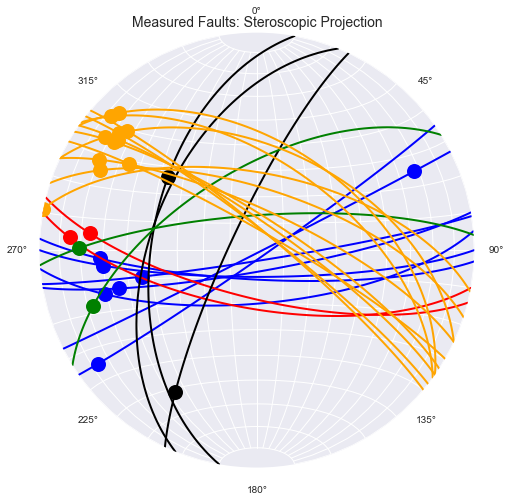

In [56]:
sns.set(color_codes=False)
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111, projection='stereonet')

fault_lst = list(df_combine[df_combine.type == 'fault'][['strike','dip','rake']].values)
for fault in fault_lst:
    strike, dip, rake = fault
 #   if rake >= 0:
colors = ['blue','red','yellow','black', 'green','orange']
i=0
for key, group in groups_bins:    
    ax.plane(group.strike, group.dip, '-', color=colors[i], linewidth=2 ,label=key)
  #  ax.pole(group.strike, group.dip, '^',color='blue', markersize=10)
    ax.rake(group.strike, group.dip, group.rake, color=colors[i], markersize=15)
    i=i+1
#ax.legend()
plt.title("Measured Faults: Steroscopic Projection", fontsize=14)
plt.show()

C:\Anaconda3\lib\site-packages\mplstereonet\stereonet_math.py:223: RuntimeWarning: invalid value encountered in less
  rake_angle[rake_angle < 0] += 180


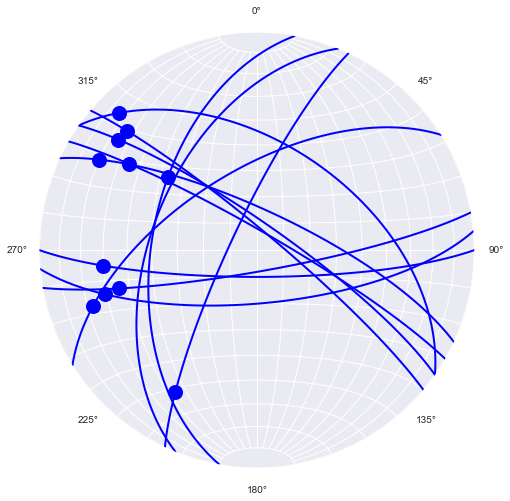

In [53]:
fig = plt.figure()
fig.set_size_inches(8, 8)
ax = fig.add_subplot(111, projection='stereonet')
fault_lst = list(df_combine[df_combine.type == 'fault'][['strike','dip','rake']].values)
for fault in fault_lst:
    strike, dip, rake = fault
    ax.plane(strike, dip, '-', color='b', linewidth=2 ,label=key)
  #  ax.pole(group.strike, group.dip, '^',color='blue', markersize=10)
    ax.rake(strike, dip, rake, color='b', markersize=15)

plt.show()

In [51]:
fault_lst = list(df_combine[df_combine.type == 'fault'][['strike','dip','rake']].values)
for fault in fault_lst:
    strike, dip, rake = fault
    print ( strike, dip, rake)

295.0 75.0 18.0
202.0 50.0 nan
300.0 83.0 30.0
305.0 50.0 15.0
205.0 80.0 26.0
90.0 80.0 150.0
310.0 83.0 20.0
80.0 82.0 145.0
85.0 70.0 150.0
238.0 60.0 25.0
305.0 80.0 20.0
190.0 50.0 110.0


In [52]:
fault_lst

[array([ 295.,   75.,   18.]),
 array([ 202.,   50.,   nan]),
 array([ 300.,   83.,   30.]),
 array([ 305.,   50.,   15.]),
 array([ 205.,   80.,   26.]),
 array([  90.,   80.,  150.]),
 array([ 310.,   83.,   20.]),
 array([  80.,   82.,  145.]),
 array([  85.,   70.,  150.]),
 array([ 238.,   60.,   25.]),
 array([ 305.,   80.,   20.]),
 array([ 190.,   50.,  110.])]